In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
with open('YoEnBici.csv', mode='r') as archivo:
    datos = csv.reader(archivo)
    encabezado = next(datos,None)
    if encabezado:
        print("Primeras lineas", encabezado)
    t, latitud, longitud, altitud = [] , [] , [] , []
    for renglon in datos:
        t.append(float(renglon[0]))
        latitud.append(float(renglon[1]))
        longitud.append(float(renglon[2]))
        altitud.append(float(renglon[3]))
t, latitud = np.array(t), np.array(latitud)
longitud, altitud = np.array(longitud), np.array(altitud)

Primeras lineas ['Time (s)', 'Latitude (°)', 'Longitude (°)', 'Altitude (m)', 'Altitude WGS84 (m)', 'Speed (m/s)', 'Direction (°)', 'Distance (km)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (m)', 'Satellites']


-99.15379034 19.36910277
-99.18080766 19.32471254


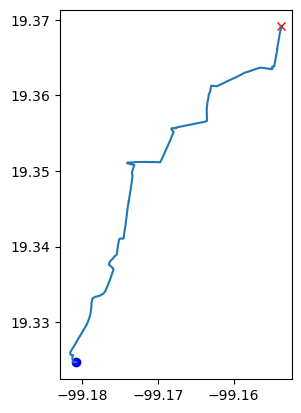

In [3]:
print(longitud[0],latitud[0])
print(longitud[-1],latitud[-1])
plt.plot(longitud[0],latitud[0],'rx')
plt.plot(longitud[-1],latitud[-1],'bo')
plt.plot(longitud,latitud)
plt.gca().set_aspect('equal')
plt.show()

In [11]:
def leer_csv_dat(arch):
    with open(arch, mode='r') as archivo:
        datos = csv.reader(archivo)
        encabezado = next(datos,None)
        mat_dat = []
        for renglon in datos:
            mat_dat.append(renglon[:4])
    dat = np.zeros( (len(mat_dat),4) )
    #i renglon y j es el columna
    for i in range(len(mat_dat)):
        for j in range(4):
            dat[i,j] = mat_dat[i][j]
    return dat

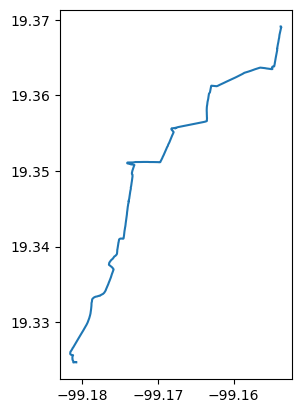

In [12]:
mat = leer_csv_dat('YoEnBici.csv')
plt.plot(mat[:,2],mat[:,1])
plt.gca().set_aspect('equal')
plt.show()

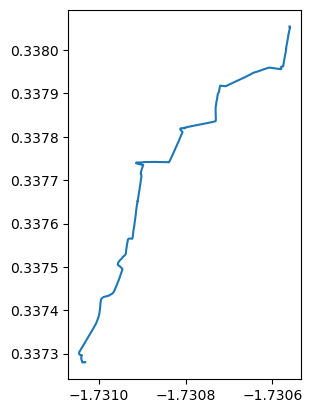

In [13]:
lat = np.deg2rad(mat[:,1])
long = np.deg2rad(mat[:,2])
plt.plot(long,lat)
plt.gca().set_aspect('equal')
plt.show()

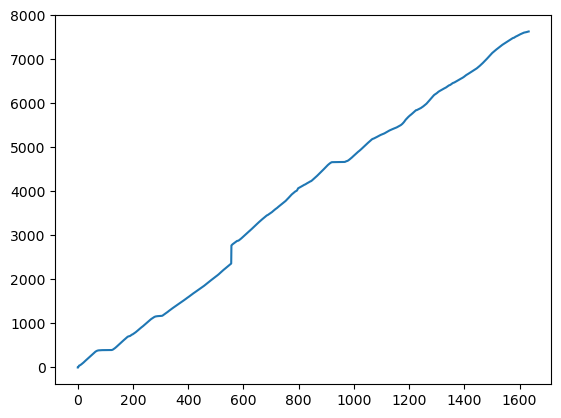

In [14]:
RT = 6731000
t = mat[:,0]
x = (RT+mat[:,3])*np.cos(lat)*np.cos(long)
y = (RT+mat[:,3])*np.cos(lat)*np.sin(long)
z = (RT+mat[:,3])*np.sin(lat)
dist_acumulada = np.zeros( len(mat[:,1]) )
for i in range(len(mat[:,1])-1):
    dist_acumulada[i+1] = dist_acumulada[i] + np.sqrt( (x[i+1]-x[i])**2 + (y[i+1]-y[i])**2 + (z[i+1]-z[i])**2 )
plt.plot(t,dist_acumulada)
plt.show()

In [16]:
dist_acumulada[-1]

7629.816869995714